In [1]:
%matplotlib inline


# Create and Plot Signals


Use PySoundTool to create and plot signals / noise and add them together at a specific SNR.

To see how PySoundTool implements this, see `pysoundtool.dsp.generate_sound`, 
`pysoundtool.dsp.generate_noise` and `pysoundtool.dsp.add_backgroundsound`.



In [2]:
# to be able to import pysoundtool from parent directory:
import os
package_dir = '../'
os.chdir(package_dir)

Let's import pysoundtool, assuming it is in your working directory:



In [3]:
import pysoundtool_online as pyst;

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of typ

# Create a Signal


First let's set what sample rate we want to use



In [4]:
sr = 8000

## Let's create a signal of 10 Hz 



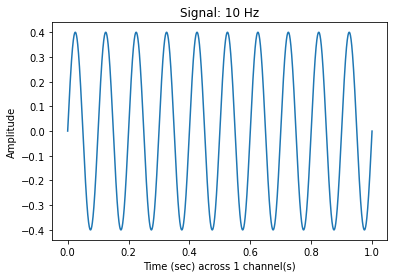

In [5]:
sig1_hz = 10
sig1, sr = pyst.generate_sound(freq=sig1_hz, amplitude = 0.4, sr=sr, dur_sec=1)
pyst.plotsound(sig1, sr=sr, feature_type = 'signal',
               title = 'Signal: {} Hz'.format(sig1_hz))

## Let's create a signal of 20 Hz



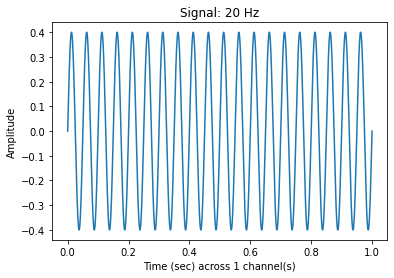

In [6]:
sig2_hz = 20 
sig2, sr = pyst.generate_sound(freq=sig2_hz, amplitude= 0.4, sr=sr, dur_sec=1)
pyst.plotsound(sig2, sr=sr, feature_type = 'signal',
               title = 'Signal: {} Hz'.format(sig2_hz))

# Combine Signals 



Add them together and see what they look like:



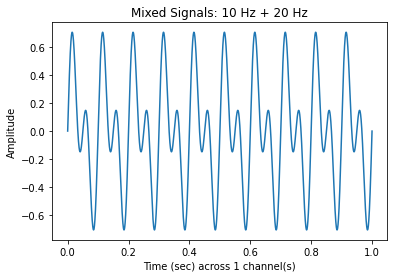

In [7]:
sig3 = sig1 + sig2
pyst.plotsound(sig3, sr=sr, feature_type = 'signal', 
               title='Mixed Signals: {} Hz + {} Hz'.format(sig1_hz, sig2_hz))

# Generate Pseudo-Random Noise



## Create noise to add to the signal:



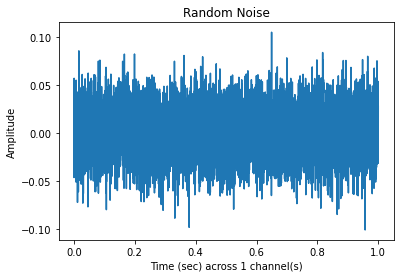

In [8]:
noise = pyst.generate_noise(len(sig3), amplitude=0.025, random_seed=40)
pyst.plotsound(noise, sr=sr, feature_type = 'signal', title='Random Noise')

# Control SNR: Adding a Background Sound



## Add noise at signal-to-noise ratio of 40



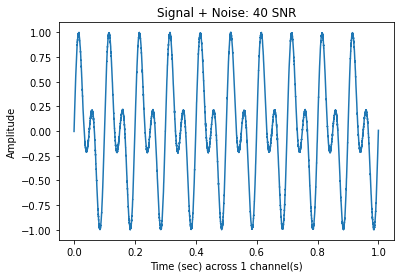

In [9]:
sig_noisy, snr = pyst.dsp.add_backgroundsound(audio_main = sig3, 
                                         audio_background = noise, 
                                         sr = sr,
                                         snr = 40)

# keep energy between 1 and -1 
sig_noisy = pyst.dsp.scalesound(sig_noisy, max_val=1)
pyst.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: 40 SNR')

## Add noise at signal-to-noise ratio of 20



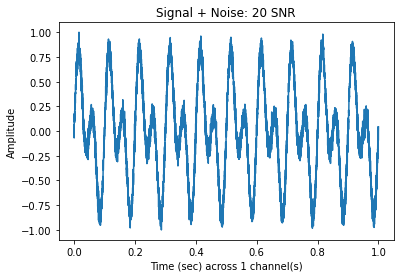

In [10]:
sig_noisy, snr = pyst.dsp.add_backgroundsound(audio_main = sig3, 
                                         audio_background = noise,
                                         sr = sr,
                                         snr = 20)
# keep energy between 1 and -1 
sig_noisy = pyst.dsp.scalesound(sig_noisy, max_val=1)
pyst.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: 20 SNR')

## Add noise at signal-to-noise ratio of 10



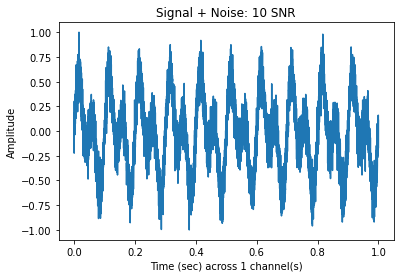

In [11]:
sig_noisy, snr = pyst.dsp.add_backgroundsound(audio_main = sig3, 
                                         audio_background = noise,
                                         sr = sr,
                                         snr = 10)
# keep energy between 1 and -1 
sig_noisy = pyst.dsp.scalesound(sig_noisy, max_val=1)
pyst.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: 10 SNR')

## Add noise at signal-to-noise ratio of 0



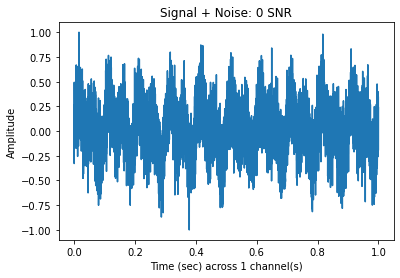

In [12]:
sig_noisy, snr = pyst.dsp.add_backgroundsound(audio_main = sig3,
                                         audio_background = noise,
                                         sr = sr,
                                         snr = 0)
# keep energy between 1 and -1 
sig_noisy = pyst.dsp.scalesound(sig_noisy, max_val=1)
pyst.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: 0 SNR')

## Add noise at signal-to-noise ratio of -10



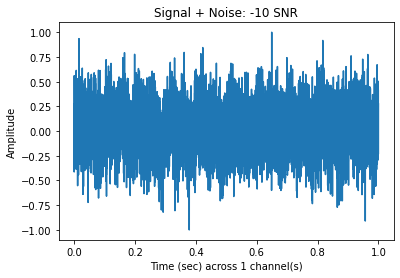

In [13]:
sig_noisy, snr = pyst.dsp.add_backgroundsound(audio_main = sig3, 
                                         audio_background = noise,
                                         sr = sr,
                                         snr = -10)
# keep energy between 1 and -1 
sig_noisy = pyst.dsp.scalesound(sig_noisy, max_val=1)
pyst.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: -10 SNR')